# Modelling the behavior of a mass-on-spring system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import seed, random
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, Bidirectional

%matplotlib inline

/home/bipe26194/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/bipe26194/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
np.random.seed(1337)  # for reproducibility

data = pd.read_csv("data/SpringData.csv", na_filter=False)

# The first 5 rows of the csv
print(data.head(5))

   VideoAnalysis: Time (s)  VideoAnalysis: X  VideoAnalysis: Y  \
0                 0.000000         -1.054688          0.222656   
1                 0.033367         -1.445312        -13.539062   
2                 0.066733         -1.054688        -36.414062   
3                 0.100100          0.375000        -51.472656   
4                 0.133467         -1.750000        -64.359375   

   VideoAnalysis: X Velocity  VideoAnalysis: Y Velocity  
0                  -3.473089                -475.292936  
1                   3.892592                -527.293345  
2                  13.162619                -515.316715  
3                  -1.118673                -407.544929  
4                  -1.908898                -261.291443  


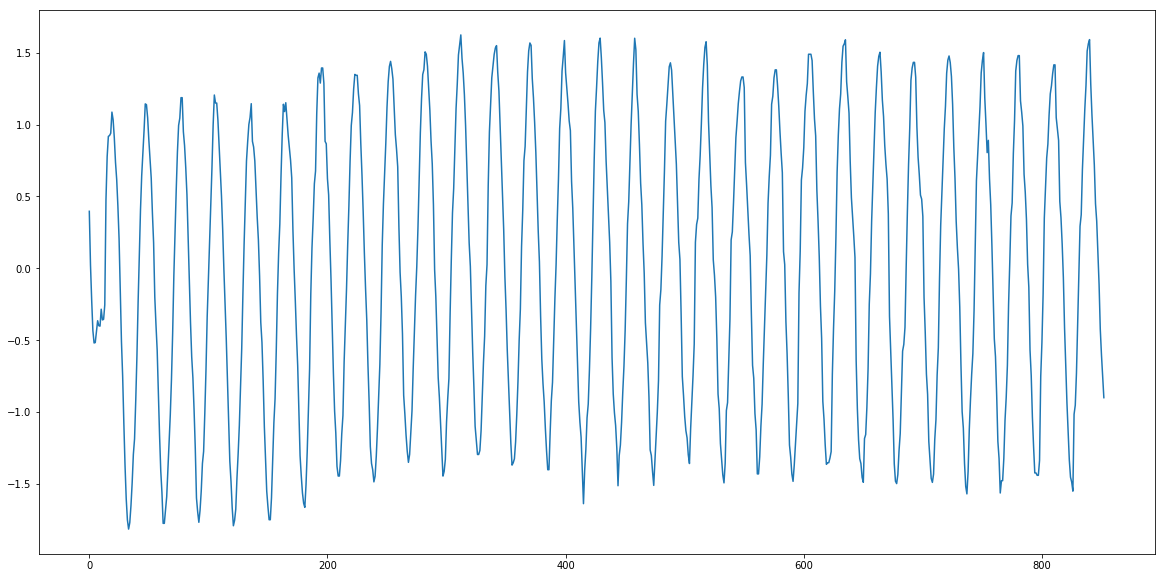

In [3]:
window = 1
edge = int(np.ceil(window/2))

def preprocess(data):
    # Calculate the moving average
    data = data.rolling(window=window,center=True).mean()
    # Trim the data that wasn't part of the moving average
    data = data[edge:-edge]
    # Standardize the data
    return preprocessing.scale(data) 

t = data["VideoAnalysis: Time (s)"][edge:-edge]
X_data = preprocess(data["VideoAnalysis: X"])
Y_data = preprocess(data["VideoAnalysis: Y"])

plt.figure(figsize=(20,10))
# plt.plot(x)
plt.plot(Y_data)

In [4]:
def _load_data(data, n_prev = 120):
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.2):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(pd.DataFrame(Y_data), 0.3)

In [5]:
# define model structure
model = Sequential()
model.add(Bidirectional(LSTM(units=5, return_sequences=False), input_shape=(None, 1)))
# model.add(Bidirectional(CuDNNLSTM(units=10, return_sequences=True)))
# model.add(Bidirectional(CuDNNLSTM(units=10, return_sequences=False)))
model.add(Dense(units=1, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="adam")

In [17]:
print(X_train.shape)
print(y_train.shape)

(477, 120, 1)
(477, 1)


In [18]:
# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Train on 429 samples, validate on 48 samples
Epoch 1/100
429/429 [==============================] - 2s 4ms/step - loss: 1.5709 - val_loss: 1.4037
Epoch 2/100
429/429 [==============================] - 1s 2ms/step - loss: 1.4237 - val_loss: 1.2688
Epoch 3/100
429/429 [==============================] - 1s 2ms/step - loss: 1.2839 - val_loss: 1.1367
Epoch 4/100
429/429 [==============================] - 1s 2ms/step - loss: 1.1472 - val_loss: 1.0032
Epoch 5/100
429/429 [==============================] - 1s 2ms/step - loss: 1.0067 - val_loss: 0.8678
Epoch 6/100
429/429 [==============================] - 1s 2ms/step - loss: 0.8627 - val_loss: 0.7338
Epoch 7/100
429/429 [==============================] - 1s 2ms/step - loss: 0.7194 - val_loss: 0.5993
Epoch 8/100
429/429 [==============================] - 1s 2ms/step - loss: 0.5766 - val_loss: 0.4727
Epoch 9/100
429/429 [==============================] - 1s 3ms/step - loss: 0.4459 - val_loss: 0.3543
Epoch 10/100
429/429 [========================

Epoch 81/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0124
Epoch 82/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0124
Epoch 83/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0127
Epoch 84/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0124
Epoch 85/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0126
Epoch 86/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0123
Epoch 87/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0125
Epoch 88/100
429/429 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0128
Epoch 89/100
429/429 [==============================] - 1s 2ms/step - loss: 0.0137 - val_loss: 0.0123
Epoch 90/100
429/429 [==============================] - 1s 2ms/step - loss: 0.0134

In [19]:
# evaluate model fit
print(X_test.shape)
score = model.evaluate(X_test, y_test)
print('Test score:', score)

(136, 120, 1)
136/136 [==============================] - 0s 439us/step
Test score: 0.020562950466923854


In [20]:
# visualize predictions
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

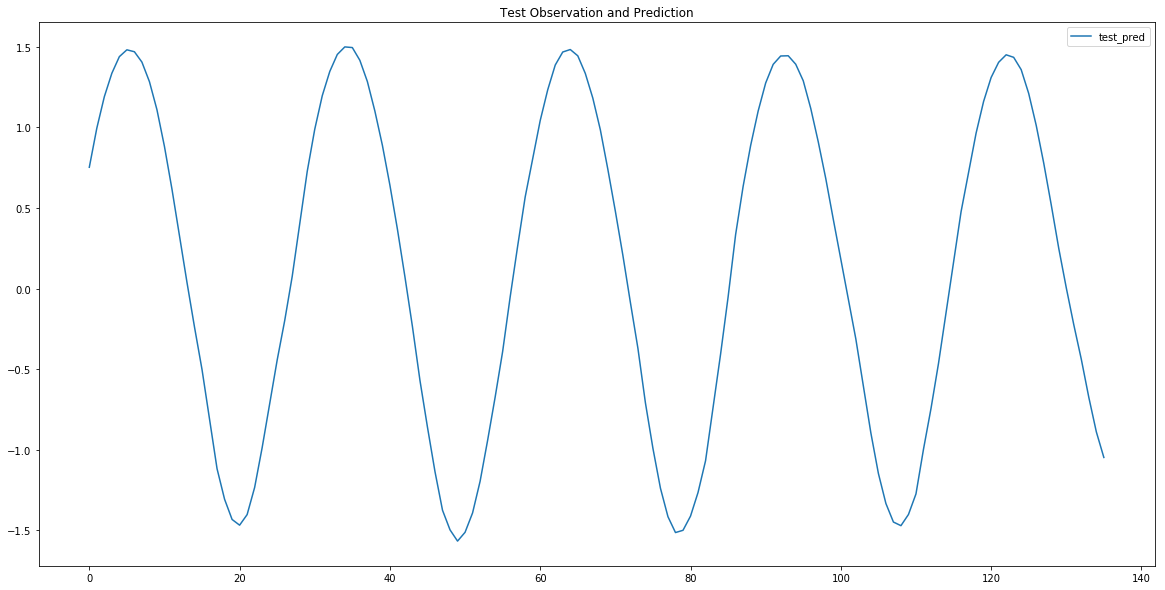

In [21]:
plt.figure(figsize=(20,10))
# plt.plot(y_test[:], label='test_data')
plt.plot(test_prediction[:], label='test_pred')
plt.title('Test Observation and Prediction')
plt.legend()

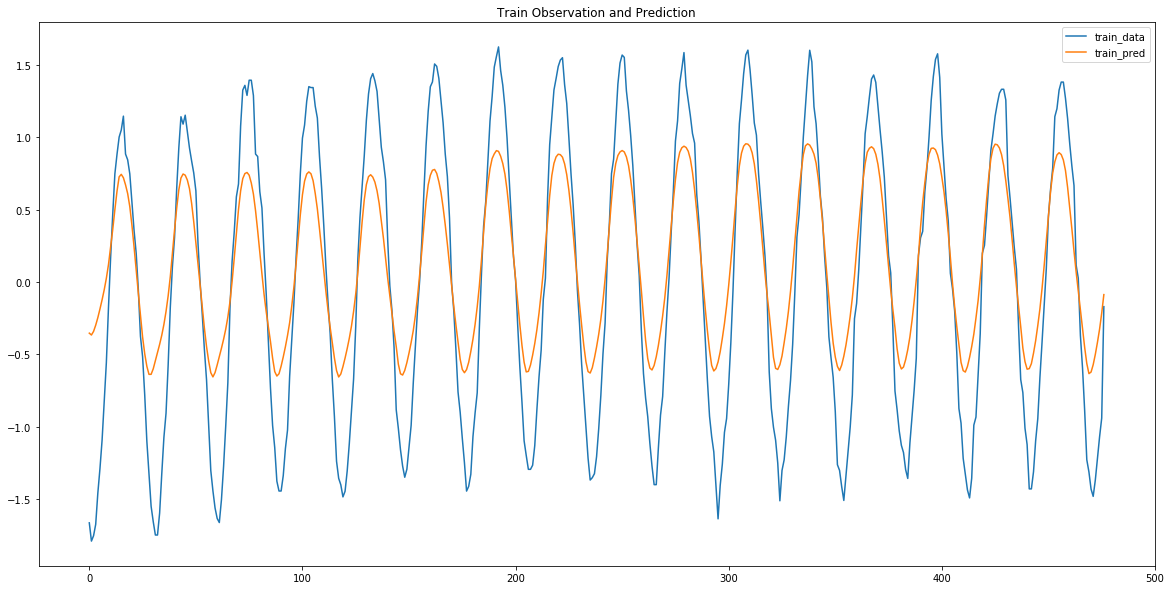

In [11]:
plt.figure(figsize=(20,10))
plt.plot(y_train[:], label='train_data')
plt.plot(train_prediction[:], label='train_pred')
plt.title('Train Observation and Prediction')
plt.legend()